Test notebook


In [1]:
# %%

import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np



In [2]:

''' Format plots'''

fsize = 11
tsize = 18
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('default')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = fsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["yellowgreen", "black", "dimgrey", 'darkgreen', 'aqua', 'deepskyblue', 'orange', 'blue', 'indianred']) 



Import the data from the runs 

In [6]:
# all_strike_prices = np.load(f'C:/Users/LukaK/OneDrive - Durham University/Projects/Agent based modelling easy/PowerSim/data_out/all_strike_prices.npy')
# total_per_tech = np.load(f'C:/Users/LukaK/OneDrive - Durham University/Projects/Agent based modelling easy/PowerSim/data_out/total_per_tech.npy')

import os

directory = 'data/3test'

npy_files = [filename for filename in os.listdir(directory) if filename.endswith('total_per_tech.npy')]

# Load the first file to initialize the array


arrays =[]
# stack the remaining files
for filename in npy_files[1:]:
    filepath = os.path.join(directory, filename)
    file_data = np.load(filepath)
    arrays.append(file_data)

total_per_tech = np.stack(arrays, axis =0)
'''[run, year, tech, hour]'''


print(np.shape(total_per_tech))



''' set the number parameters from the run'''
n_days = 14
n_years = 30


descriptor  = 'not working'
tech_types = ['nuclear', 'coal', 'fossil_fuel', 'bioenergy', 'wind_onshore', 'wind_offshore', 'solar', 'hydro', 'CCGT']


(1, 15, 9, 48)


0.0011891080925906276 0.9788560863166272


change data 

In [63]:

from scipy.stats import norm

x = range(1, n_years+1)
data = np.mean(total_per_tech, axis = 3)  # 10 sets of 100 data points

print(np.shape(data))

# Generate some sample data


# Loop through each of the 5 sets of data
mean_all = []
stdev_all = []
for j in range(data.shape[2]):
    means = []
    stdev = []
    # Loop through each of the 10 sets of data within the current set
    for i in range(data.shape[1]):
        y = data[:, i, j]
        mu, std = norm.fit(y)
        means.append(mu)
        stdev.append(std)
    # Calculate the average parameters and errors for the current set
   
    # Add the average parameters and errors to the list for all sets
    mean_all.append(means)
    stdev_all.append(stdev)

mean_all = np.array(mean_all)
stdev_all = np.array(stdev_all)
# Calculate the average parameters and errors for all sets

# Print the results
mean_all.shape

(25, 30, 9)


(9, 30)

Make the graphs

array([[89.18411055, 89.18411055, 89.18411055, ..., 89.06898349,
        89.04548389, 89.04521334],
       [89.18411055, 89.18411055, 89.22464969, ..., 89.06898349,
        89.04521334,  7.86356289],
       [89.44665145, 89.44665145, 89.44665145, ..., 89.75296463,
        89.58558211, 89.44665145],
       ...,
       [ 6.08189208,  6.0621334 ,  6.02309942, ...,  6.20211003,
         6.1422168 ,  6.0621334 ],
       [ 6.09099764,  6.09099764,  6.09099764, ...,  6.24100864,
         6.22466968,  6.16163303],
       [ 5.93633142,  5.93633142,  5.84002153, ...,  6.25728655,
         6.22466968,  6.16163303]])

(30, 9, 96)
(9, 96)


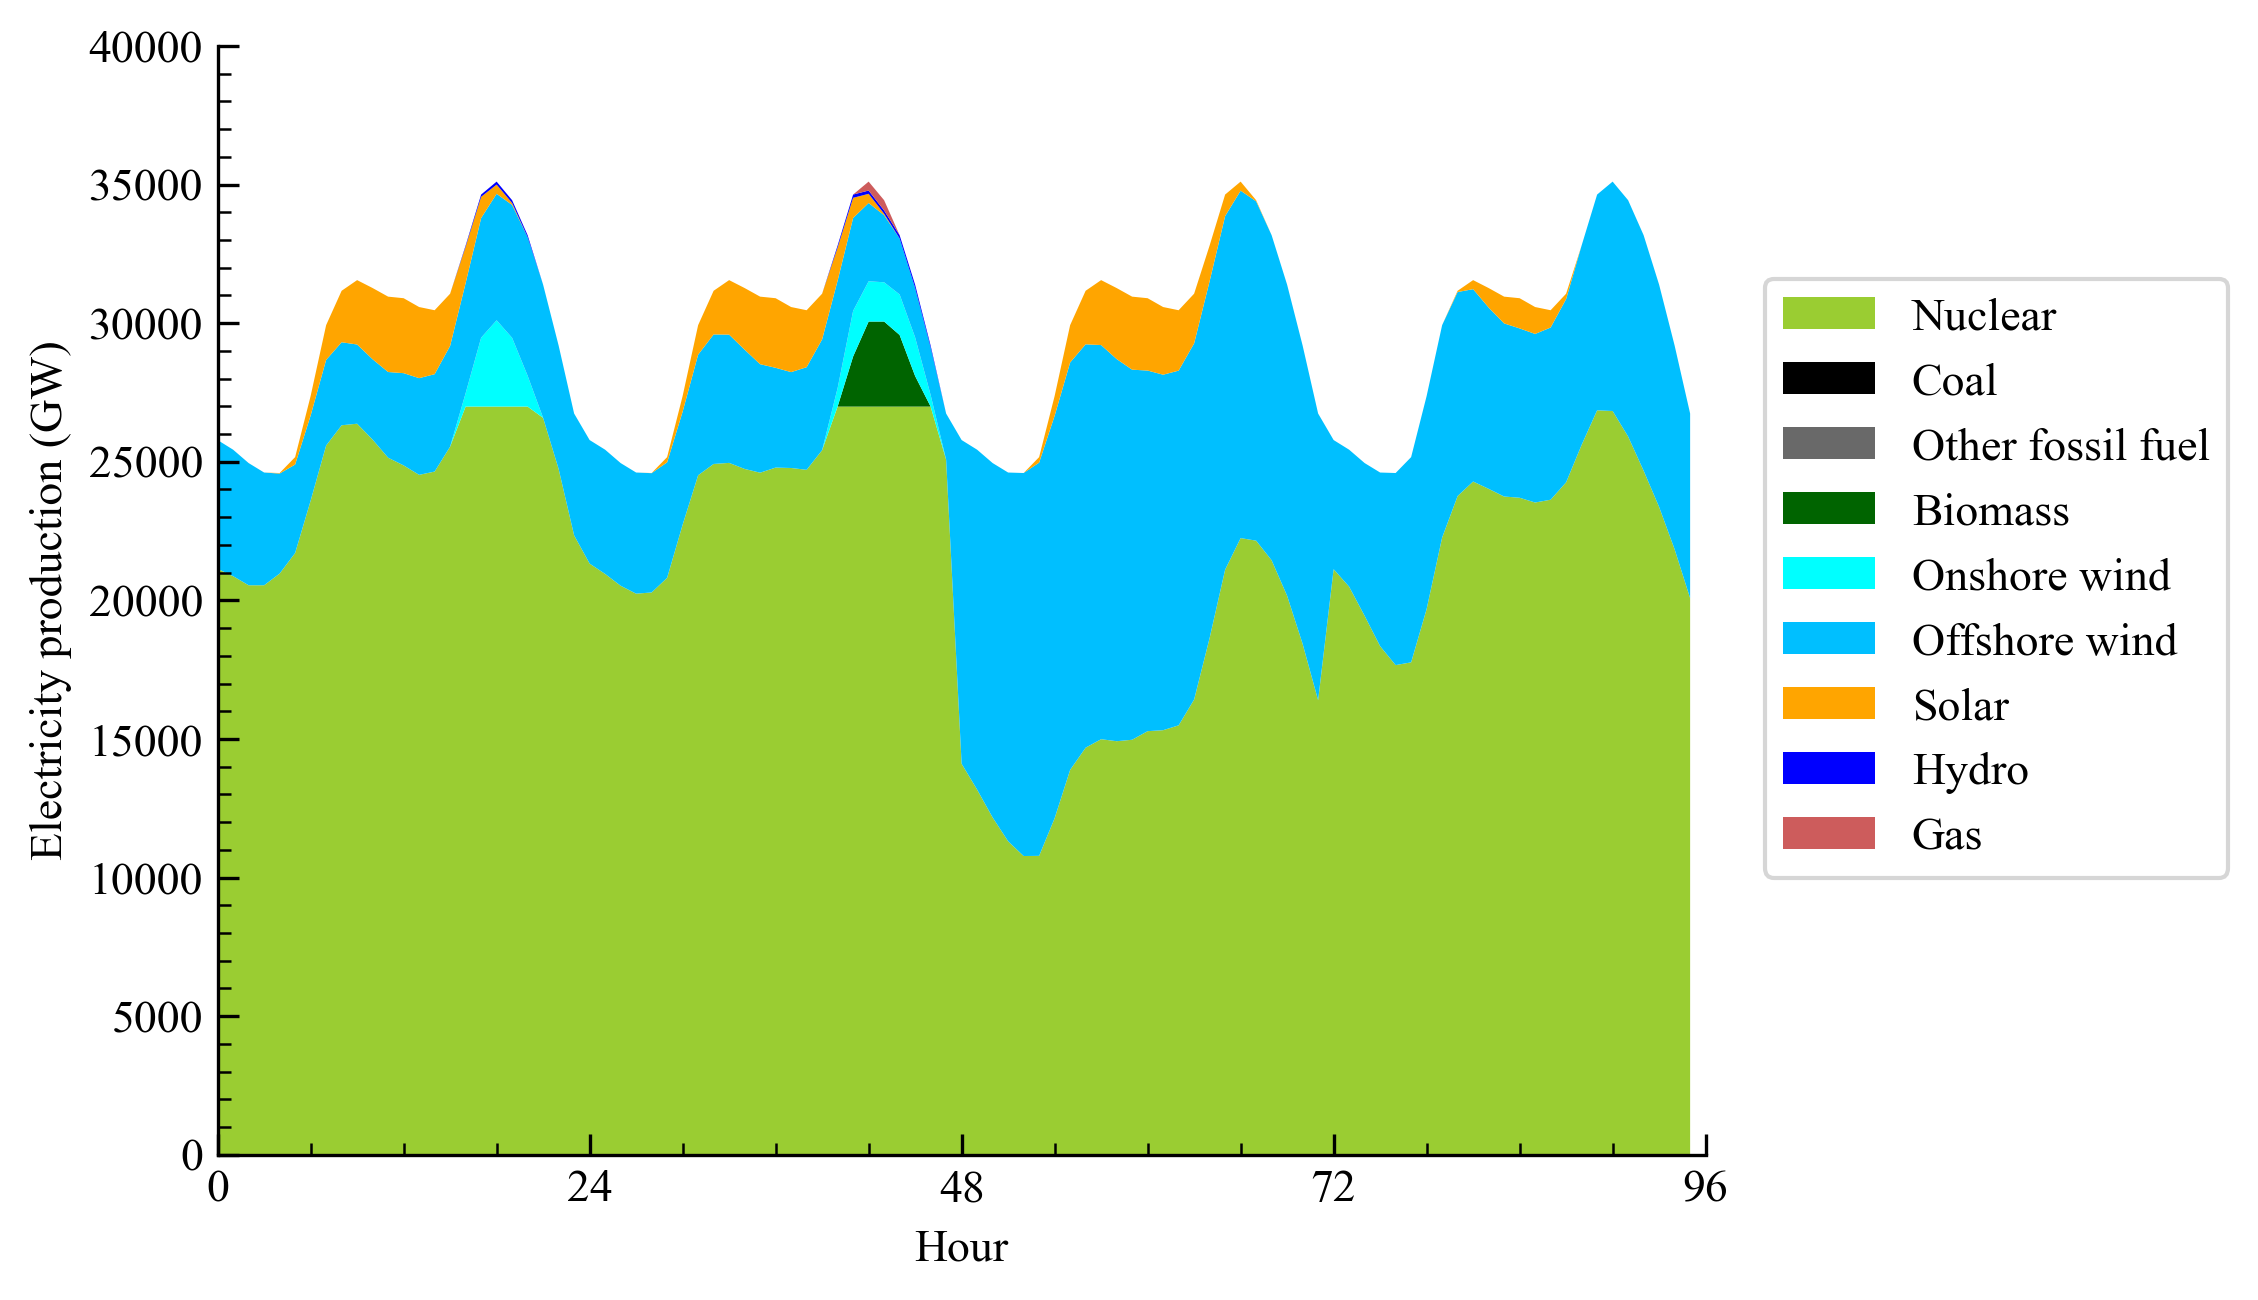

In [36]:


#%%
'''Stacked plot of daily production'''

fig, ax = plt.subplots()

total_per_tech = np.load(r'C:\Users\LukaK\OneDrive - Durham University\Projects\Agent based modelling easy\data\3test\28164_total_per_tech.npy')

prices = np.load(r'C:\Users\LukaK\OneDrive - Durham University\Projects\Agent based modelling easy\data\3test\28164_all_strike_prices.npy')
display(prices)


print(np.shape(total_per_tech))

ydata = total_per_tech[17,:,:]
n_days = 4


# ydata = total_per_tech[2,29,:,:]/1000

print(np.shape(ydata))

xdata = range((n_days*24))

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["yellowgreen", "black", "dimgrey", 'darkgreen', 'aqua', 'deepskyblue', 'orange', 'blue', 'indianred']) 

# print(ydata)
tech_types_named =  ['Nuclear', 'Coal', 'Other fossil fuel','Biomass', 'Onshore wind', 'Offshore wind', 'Solar', 'Hydro', 'Gas']
ax.stackplot(xdata,*ydata, labels = [t for t in tech_types_named])
#have to remove the historical data from the plot



ax.set_ylabel('Electricity production (GW)')
ax.set_xlabel('Hour')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_major_locator(MultipleLocator(24))
ax.set_xlim(0, len(xdata))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.legend(loc = (1.04, 0.25))
# ax.set_xlim(0, n_years)
# ax.set_ylim(min(average_yearly_strike_prices) - 5, (max(average_yearly_strike_prices) + 5))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

#plt.savefig(fname = f'{descriptor}year production by day', bbox_inches = "tight" )
plt.show()



(30, 9)


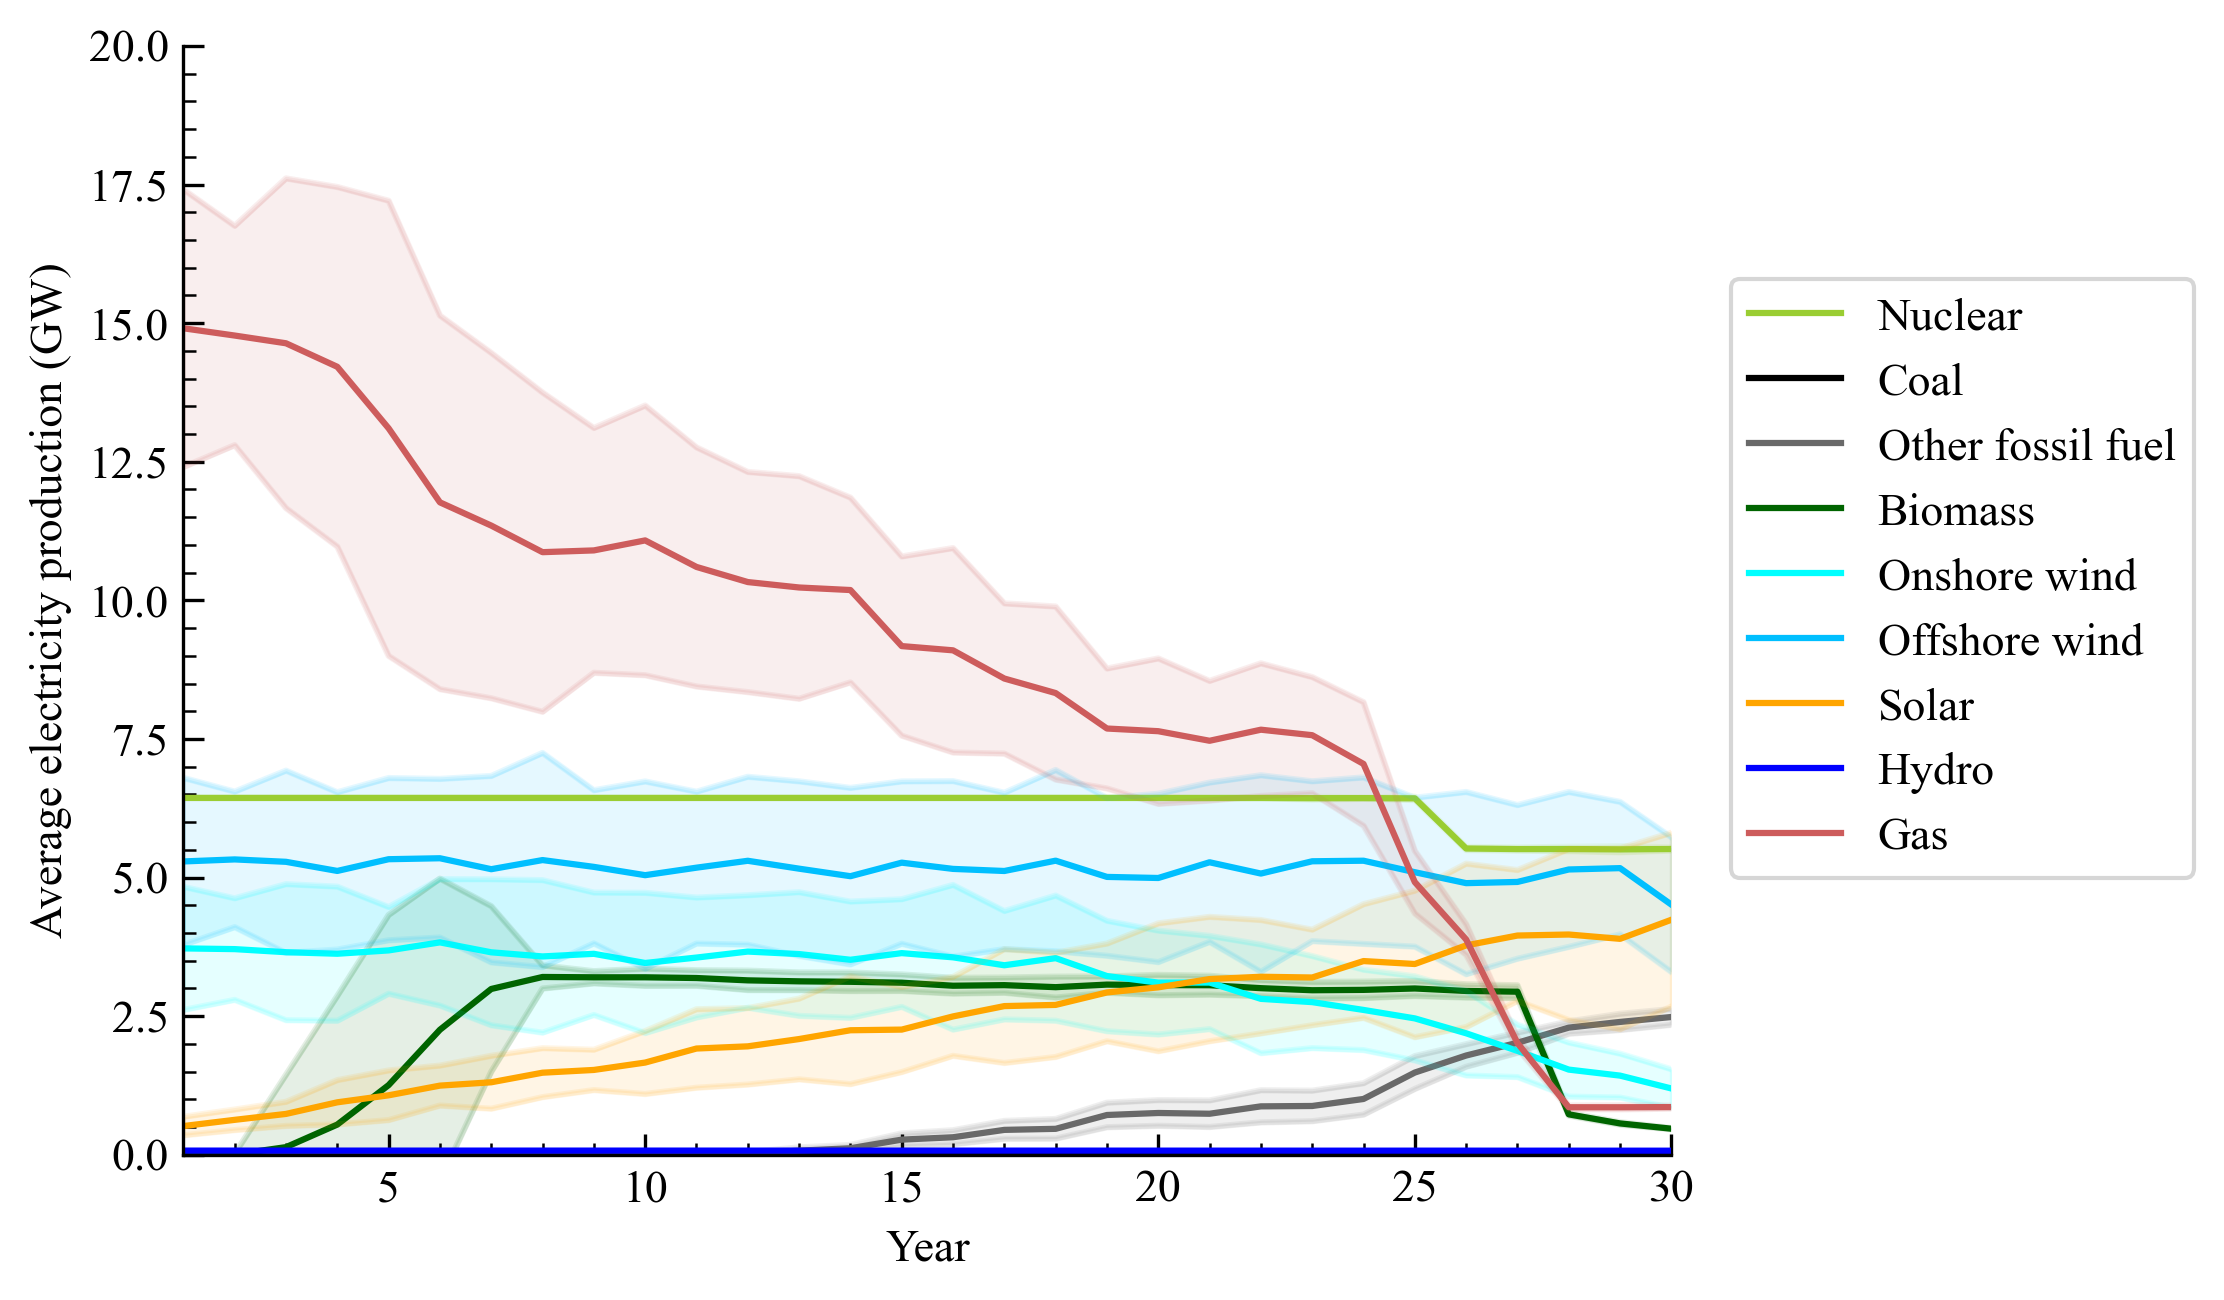

In [68]:


fig, ax = plt.subplots()

total_per_tech_average= np.mean(total_per_tech, axis=3)

ydata = np.mean(total_per_tech_average, axis = 0)
print(np.shape(ydata))
xdata = range(1, n_years+1)

# print(ydata)
tech_types_named =  ['Nuclear', 'Coal', 'Other fossil fuel','Biomass', 'Onshore wind', 'Offshore wind', 'Solar', 'Hydro', 'Gas']
colours = ["yellowgreen", "black", "dimgrey", 'darkgreen', 'aqua', 'deepskyblue', 'orange', 'blue', 'indianred']
for i in range(9):
    y = ydata[:,i]/(960)
    ax.plot(xdata,y, label =  tech_types_named[i], color = colours[i])
    ax.plot(xdata, (mean_all[i,:] + 2*stdev_all[i, :])/960, color = colours[i], alpha = 0.1)
    ax.plot(xdata, (mean_all[i,:] - 2*stdev_all[i, :])/960, color = colours[i], alpha = 0.1)
    ax.fill_between(xdata, (mean_all[i,:] + 2*stdev_all[i, :])/960, (mean_all[i,:] - 2*stdev_all[i, :])/960,color = colours[i], alpha = 0.1)
#have to remove the historical data from the plot

ax.set_ylabel('Average electricity production (GW)')
ax.set_xlabel('Year')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.set_xlim(1, max(xdata))
ax.set_ylim(0)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.legend(loc = (1.04, 0.25))
# ax.set_xlim(0, n_years)
# ax.set_ylim(min(average_yearly_strike_prices) - 5, (max(average_yearly_strike_prices) + 5))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.savefig(fname = f'{descriptor}average_production yearly', bbox_inches = "tight" )
plt.show()




In [69]:

'''Get average yearly prices'''


npy_files = [filename for filename in os.listdir(directory) if filename.endswith('all_strike_prices.npy')]

# Load the first file to initialize the array


arrays =[]
# stack the remaining files
for filename in npy_files[1:]:
    filepath = os.path.join(directory, filename)
    file_data = np.load(filepath)
    arrays.append(file_data)

yearly_price = np.stack(arrays, axis =0)
'''[run, year, tech, hour]'''

print(yearly_price[8,:,2])


[8.68221719e+01 8.68451287e+01 8.68451287e+01 8.67290753e+01
 8.66981353e+01 8.67290753e+01 8.65252030e+01 8.66951855e+01
 8.66981353e+01 8.65755926e+01 8.66981353e+01 8.66981353e+01
 8.67290753e+01 8.68221719e+01 7.86363425e+00 8.27204951e+01
 8.30403329e+01 8.31007405e+01 8.29242795e+01 8.30403329e+01
 8.27321698e+01 8.28397047e+01 8.28903896e+01 8.25669765e+01
 8.28933395e+01 8.29242795e+01 8.27707968e+01 8.28903896e+01
 9.04571934e+01 9.05170743e+01 9.04571934e+01 9.04542435e+01
 9.04571934e+01 8.99381966e+01 9.02960237e+01 9.06148782e+01
 9.05812299e+01 9.04542435e+01 9.04571934e+01 9.04571934e+01
 9.06645945e+01 9.02960237e+01 8.92862346e+01 8.90245759e+01
 8.91715693e+01 8.90555159e+01 8.85055792e+01 8.90844569e+01
 8.89709411e+01 8.89709411e+01 8.91715693e+01 8.92319770e+01
 8.89020332e+01 8.88634063e+01 8.85055792e+01 8.90555159e+01
 9.10891458e+01 9.06926917e+01 9.14190895e+01 9.11580537e+01
 9.10505188e+01 9.10387561e+01 9.10388441e+01 9.11974440e+01
 9.14190895e+01 9.115805

In [26]:
n_days = np.shape(yearly_price)[2]
n_runs = np.shape(yearly_price)[0]
print(np.shape(yearly_price))
print(yearly_price)


average_daily_p = np.mean(yearly_price, axis = 2)

av_daily_2d = average_daily_p.reshape(n_runs,n_years,n_days)
print(np.shape(av_daily_2d))

mean_yearly = np.mean(av_daily_2d, axis = 2)


x = range(1, n_years+1)
data = mean_yearly  # 10 sets of 100 data points

print(np.shape(data))

# Generate some sample data


# Loop through each of the 5 sets of data
mean_all_price = []
stdev_all_price = []

for i in range(data.shape[1]):
    y = data[:, i]
    mu, std = norm.fit(y)
    mean_all_price.append(mu)
    stdev_all_price.append(std)
# Calculate the average parameters and errors for the current set

# Add the average parameters and errors to the list for all sets


mean_all_price = np.array(mean_all_price)
stdev_all_price = np.array(stdev_all_price)
# Calculate the average parameters and errors for all sets

# Print the results
print(mean_all_price)
print(stdev_all_price)
mean_all.shape


(9, 720, 24)
[[[2.16838483e+11 2.16838483e+11 2.16838483e+11 ... 2.16838483e+11
   2.16838483e+11 2.16838483e+11]
  [6.16696278e+00 6.24258237e+00 6.62541888e+00 ... 7.12776575e+00
   6.73446901e+00 6.24258237e+00]
  [2.16838483e+11 2.16838483e+11 2.16838483e+11 ... 7.08214939e+00
   6.52731594e+00 6.16696278e+00]
  ...
  [3.69507394e+00 3.69507394e+00 3.68603591e+00 ... 3.67653590e+00
              inf            inf]
  [6.85970727e+00            inf            inf ...            inf
              inf            inf]
  [3.77979215e+00 3.78109248e+00 3.77979215e+00 ... 3.50805616e+00
              inf            inf]]

 [[2.16838483e+11 2.16838483e+11 2.16838483e+11 ... 2.16838483e+11
   2.16838483e+11 2.16838483e+11]
  [9.42474807e+01 9.42474807e+01 9.34384652e+01 ... 7.84952171e+00
   7.41681983e+00 6.97181006e+00]
  [9.42474807e+01 9.42474807e+01 9.42474807e+01 ... 2.16838483e+11
   2.16838483e+11 2.16838483e+11]
  ...
  [5.54201356e+00 5.61597400e+00 6.52824354e+00 ... 6.14065484e+

c:\Users\LukaK\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:371: RuntimeWarning: overflow encountered in square
  scale = np.sqrt(((data - loc)**2).mean())


RuntimeError: The data contains non-finite values.

ValueError: x and y must have same first dimension, but have shapes (30,) and (20,)

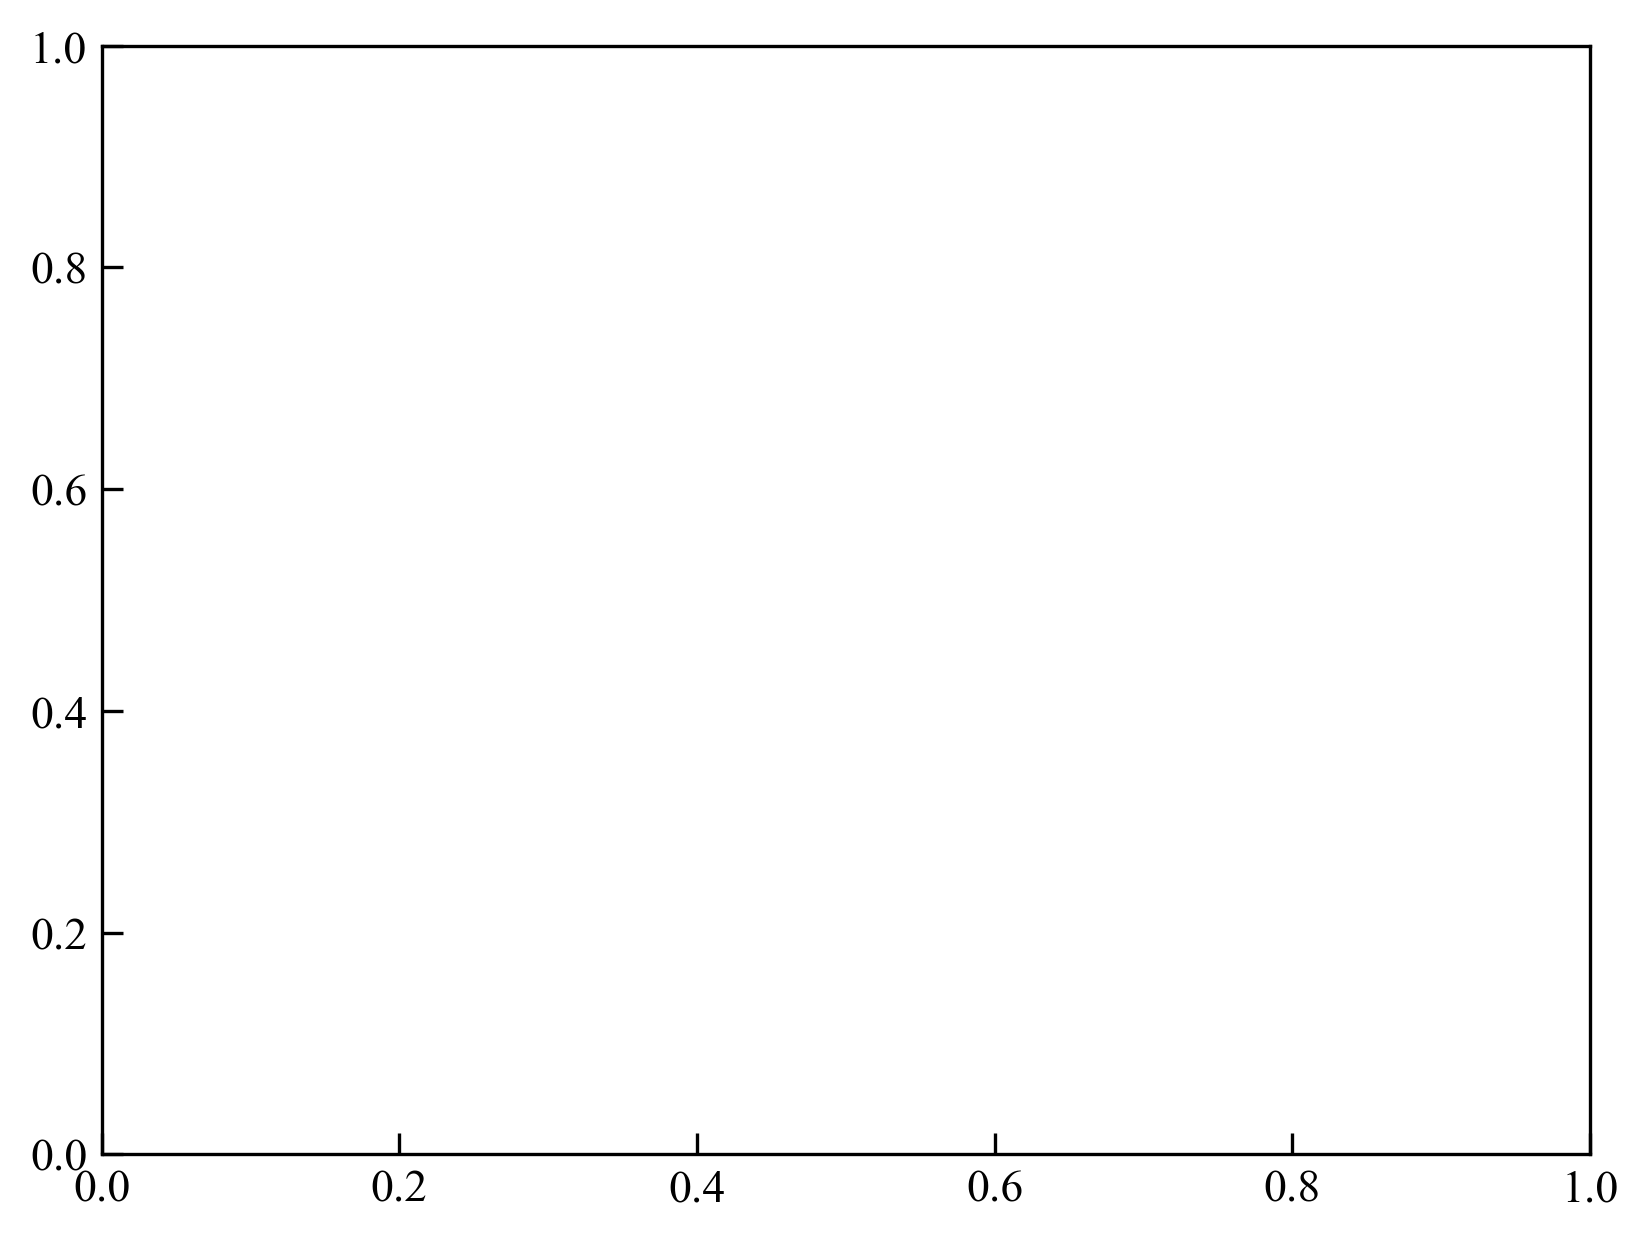

In [13]:

fig, ax = plt.subplots()


ydata = mean_all_price

xdata = range(1, n_years+1)

# print(ydata)
tech_types_named =  ['Nuclear', 'Coal', 'Other fossil fuel','Biomass', 'Onshore wind', 'Offshore wind', 'Solar', 'Hydro', 'Gas']

ax.plot(xdata,ydata, color = 'r')
ax.plot(xdata, ydata + 2*stdev_all_price, color = 'r', alpha = 0.1)
ax.plot(xdata, ydata - 2*stdev_all_price, color = 'r', alpha = 0.1)
ax.fill_between(xdata, ydata + 2*stdev_all_price, ydata - 2*stdev_all_price, color ='r', alpha = 0.1 )
#have to remove the historical data from the plot

ax.set_ylabel('Average electricity price (GBP)')
ax.set_xlabel('Year')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.set_xlim(1, max(xdata))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.legend(loc = (1.04, 0.25))
# ax.set_xlim(0, n_years)
# ax.set_ylim(min(average_yearly_strike_prices) - 5, (max(average_yearly_strike_prices) + 5))
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.savefig(fname = f'{descriptor}av. price.png', bbox_inches = "tight" )
plt.show()


In [41]:
import electricity_company
import pickle

with open('powerplants.pickle', 'rb') as f:
    obj_list_new = pickle.load(f)


In [34]:


tech_types_named =  ['Nuclear', 'Coal', 'Other fossil fuel','Biomass', 'Onshore wind', 'Offshore wind', 'Solar', 'Hydro', 'Gas']

for obj in obj_list_new: 
    if obj.name == 'RWE Npower':
        elec_co = obj

plant_list_npower = elec_co.power_plants

for plant in plant_list:
    print(plant.capacity_MW)

        for tech in tech_types:
        energy = [(plant.energy_supplied_per_hour[-(24*world.n_days):]) for plant in plant_list if plant.technology == tech and len(plant.energy_supplied_per_hour) >= 24]
        energy = np.sum(energy, axis = 0)
        y_total_per_tech.append(energy)

IndentationError: unexpected indent (Temp/ipykernel_12556/3043447157.py, line 12)

In [48]:
import os

directory = 'data/total_per_tech/7almostworking/monies/'

npy_files = [filename for filename in os.listdir(directory) if filename.endswith('.npy')]

# Load the first file to initialize the array


arrays =[]
# stack the remaining files
for filename in npy_files[1:]:
    filepath = os.path.join(directory, filename)
    file_data = np.load(filepath)
    arrays.append(file_data)

monies = np.stack(arrays, axis =0)
'''[run, year, tech, hour]'''

print(monies[6,:])

[-1.63011780e+10 -4.91396009e+10 -3.18059407e+10 -3.90625193e+10
 -5.04701551e+10 -1.12610375e+11 -4.88495733e+09 -1.60297681e+11
 -3.79362477e+09 -1.40575941e+11 -5.61197408e+09 -3.66497286e+09
 -6.44491023e+10 -2.56427498e+10 -1.94757365e+10 -1.65049449e+09
 -4.21314225e+10 -2.39757087e+10 -1.87919505e+11 -7.00387313e+07
 -1.92693913e+09 -3.62112647e+10 -6.50048583e+10 -1.46407231e+11
 -1.37003853e+10 -1.73631565e+09 -1.78992907e+09 -1.01080395e+11
 -8.57889219e+10 -3.21606454e+09 -8.42660488e+10 -1.32360795e+10
 -9.49492002e+10 -3.88874730e+10 -5.54492015e+09 -1.69202777e+10
 -1.27321869e+10 -2.93179383e+09 -1.02145763e+08 -3.41378284e+09
 -1.18586457e+10 -5.79131283e+09 -9.12375571e+10 -2.65499342e+10
 -2.90362976e+10 -1.73346365e+10 -4.03458299e+10 -1.67503479e+09
 -8.64203951e+09 -5.87917842e+10 -3.07136472e+09 -6.19974862e+10
 -5.32602367e+10 -3.09555218e+10 -1.70403878e+10 -5.51133615e+10
 -6.12971585e+10 -2.49473291e+10]
